In [2]:
import control
import numpy as np

In [3]:
num = np.array([200])
den = np.array([1, 10,100])

Gs = control.TransferFunction(num, den)
Gs

TransferFunction(array([200]), array([  1,  10, 100]))

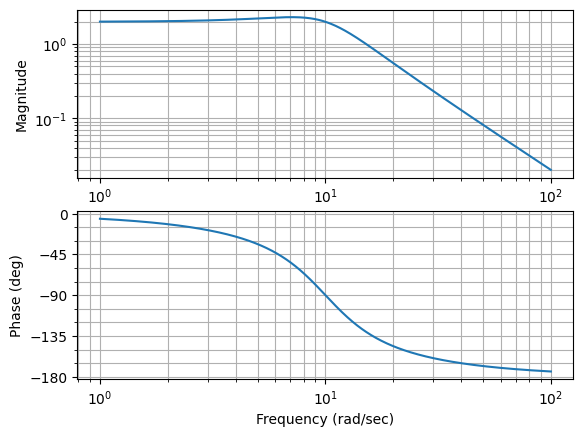

In [4]:
(mag, phase_rad, w) = control.bode_plot(Gs)

In [88]:
phase_rad

array([-0.12137514, -0.12194219, -0.12251194, -0.12308441, -0.12365961,
       -0.12423757, -0.12481828, -0.12540178, -0.12598806, -0.12657715,
       -0.12716906, -0.1277638 , -0.1283614 , -0.12896185, -0.12956518,
       -0.1301714 , -0.13078053, -0.13139259, -0.13200758, -0.13262552,
       -0.13324643, -0.13387032, -0.13449721, -0.13512711, -0.13576004,
       -0.13639601, -0.13703505, -0.13767716, -0.13832237, -0.13897068,
       -0.13962212, -0.14027669, -0.14093443, -0.14159534, -0.14225943,
       -0.14292674, -0.14359726, -0.14427103, -0.14494806, -0.14562835,
       -0.14631194, -0.14699884, -0.14768907, -0.14838264, -0.14907957,
       -0.14977988, -0.15048358, -0.1511907 , -0.15190125, -0.15261526,
       -0.15333273, -0.15405369, -0.15477816, -0.15550615, -0.15623769,
       -0.15697279, -0.15771147, -0.15845375, -0.15919965, -0.15994919,
       -0.16070239, -0.16145927, -0.16221984, -0.16298414, -0.16375217,
       -0.16452396, -0.16529953, -0.16607891, -0.1668621 , -0.16

In [5]:
(GM, PM, wg, wp) = control.margin(Gs)
wp

15.174899135519796

In [6]:
def rad2hz(rad: float)->float:
    return rad*0.159155

In [7]:
largBand = rad2hz(wp)
largBand

2.415161071913653

In [8]:
freqS = 10*largBand
Ts = 1/freqS

In [9]:
print(str(freqS) + ' Hz')
print(str(Ts)+ " s")

24.15161071913653 Hz
0.04140510592147172 s


In [10]:
Gz = control.sample_system(Gs, Ts, 'zoh')
Gz

TransferFunction(array([0.14796575, 0.12881121]), array([ 1.        , -1.52257872,  0.6609672 ]), 0.04140510592147172)

In [11]:
import matplotlib.pyplot as plt

In [12]:
Tsim = np.arange(0, 10, Ts)

In [13]:
youts, T1 = control.step_response(Gs, Tsim)

In [14]:
youtz, T2 = control.step_response(Gz, Tsim)

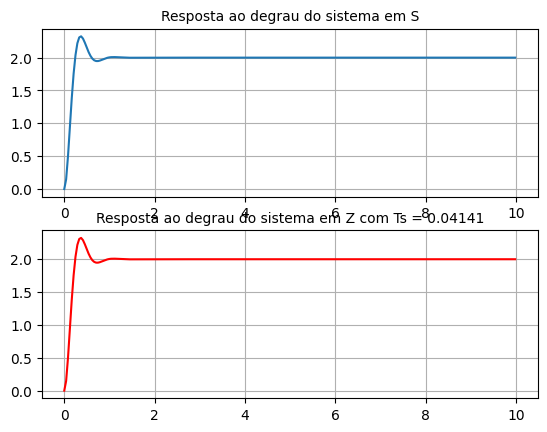

In [15]:
plt.subplot(2,1,1)
plt.title("Resposta ao degrau do sistema em S", size = 10)
plt.grid()
plt.plot(youts, T1)
plt.subplot(2,1,2)
plt.title("Resposta ao degrau do sistema em Z com Ts = "+str(round(Ts, 5)), size = 10)
plt.grid()
plt.plot(youtz, T2, color = 'red')

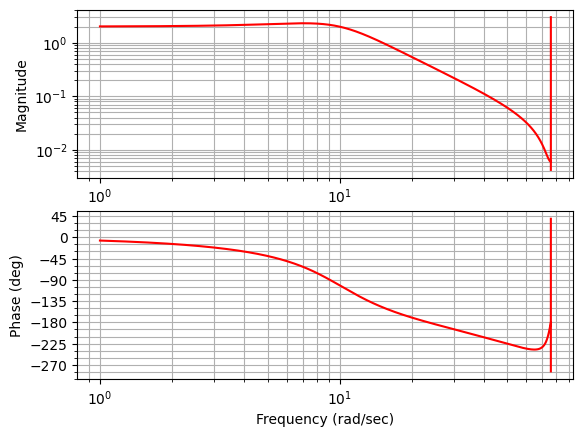

In [16]:
(mag, phase_rad, w) = control.bode_plot(Gz, color = 'red')

In [79]:
mag[10]

2.010780627904633

In [80]:
w[10]

1.0

In [17]:
# z = e^(Ts) = e^(Tjw)
# G(w) = 0.148e^(j0.0414w)+0.1288 / (e^(j0.0414w))^2 - 1.523e^(j0.0414w) +0.661

In [18]:
import cmath

In [22]:
j = complex(0, 1)
j

1j

In [62]:
w = np.arange(0, 100, 0.1)
out = []
for i in w:
    G = (0.148*cmath.exp((0.0414*i)*j)+0.1288 )/ (((cmath.exp((0.0414*i)*j))**2 - 1.523*cmath.exp((0.0414*i)*j) +0.661))
    out.append(10*cmath.log10(abs(G)))#convert to db

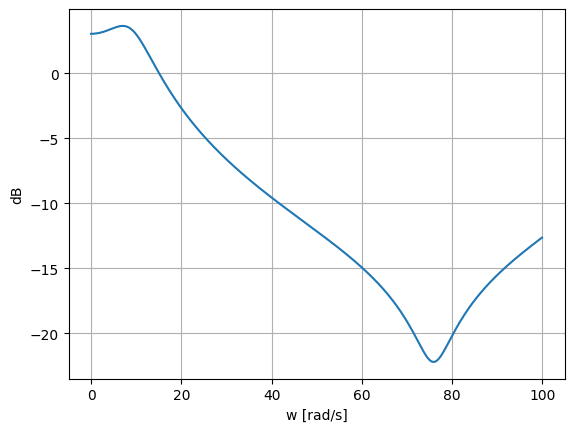

In [63]:
plt.grid()
plt.xlabel("w [rad/s]")
plt.ylabel("dB")
#plt.yscale('log')
#plt.xscale('log')
plt.plot(w, out)

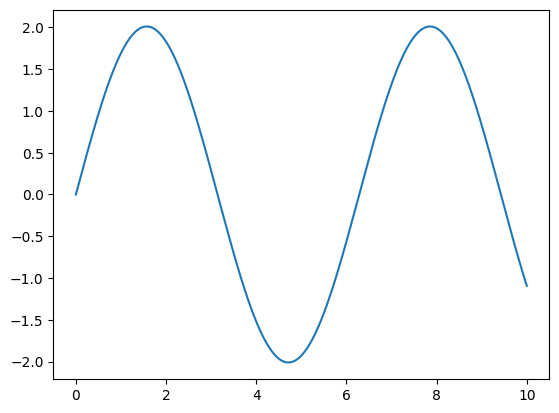

In [81]:
freq = 1 #rad/s
f = freq /(2*180*np.pi)
time = np.arange(0, 10, f)
sinal=[]
for t in time:
    sinal.append(mag[10]*np.sin(t))


plt.plot(time, sinal)

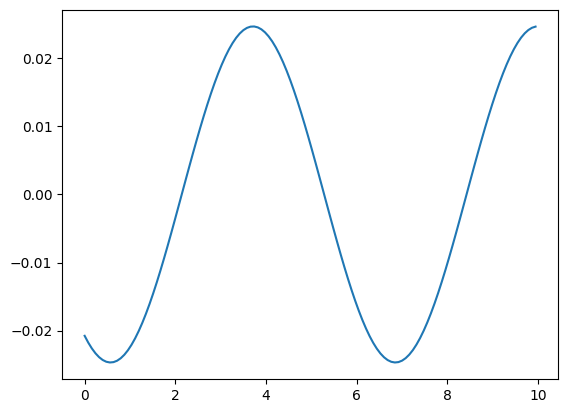

In [90]:
freq = 90 #rad/s
f = freq /(2*180*np.pi)
shift = phase_rad[10*freq]
time = np.arange(0, 10, f)
sinal=[]
ganho = mag[10*freq]
for t in time:
    sinal.append(ganho*np.sin(t-shift))


plt.plot(time, sinal)

In [125]:
def respSin(freq, color = 'blue'):
    f = freq /(2*180*np.pi)
    shift = phase_rad[10*freq]
    time = np.arange(0, 10, f)
    sinal=[]
    ganho = mag[10*freq]
    for t in time:
        sinal.append(ganho*np.sin(t-shift))
        
    plt.plot(time, sinal, color = color, label = str(freq) + 'rad/s')

In [100]:
import seaborn as sns

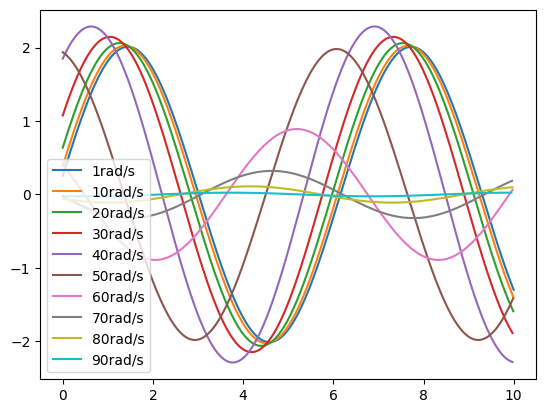

In [128]:
colors = sns.color_palette()
freqs = [1,10,20,30, 40, 50, 60,70,80,90]
for i in range(10):
    respSin(freqs[i], colors[i])
    plt.legend()
    plt.grid()


In [ ]:
freq = 1

Tsim = np.arange(0, 10, Ts)
sinalSim = []
for t in Tsim:
    sinalSim.append(sinal[t])


#control.forced_response(Gz, T = Tsim, U = sinal)

In [120]:
#Sistema primeira ordem
Gs1 = control.TransferFunction(1, [10, 1])
Gs1

TransferFunction(array([1]), array([10,  1]))

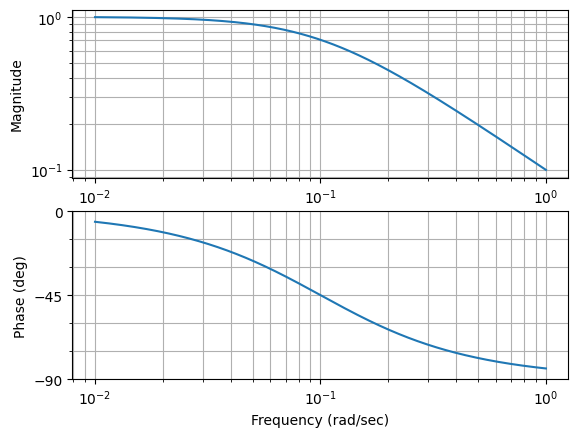

In [122]:
(mag1, phase_rad1, w1) = control.bode_plot(Gs1)
#Cai 20 dB por decada a partir de 10⁻1

In [123]:
wn = 10
coefAmort = 0.5
num2 = wn**2
den2 = [1, 2*coefAmort*wn, wn**2]
Gs2 = control.TransferFunction(num2, den2)
Gs2

TransferFunction(array([100]), array([  1.,  10., 100.]))

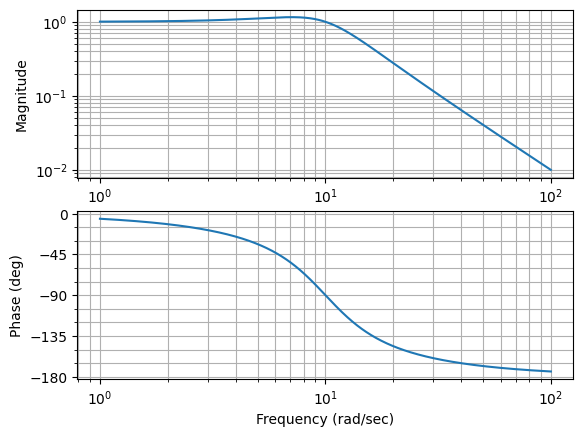

In [124]:
(mag2, phase_rad2, w2) = control.bode_plot(Gs2)
#cai 40db por decada a partir de wn
#modulo em 10rad/s = (2*0.5)**-1 = 1